<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Algoritmo_Aprendizaje_No_Supervisado_Cluster_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo No Supervisado**
## **Clustering Jerarquico**

El **clustering jerárquico** es un método de **aprendizaje no supervisado**, lo que significa que no se utiliza para hacer predicciones directas de la manera que lo harías con un modelo de aprendizaje supervisado. Por lo que la utilidad del clustering para tareas predictivas dependerá de la naturaleza de tus datos y del problema específico que estés tratando de resolver.

Sin embargo, hay varias maneras en las que puedes utilizar la información del clustering para ayudarte en tareas predictivas:

1. **Creación de Nuevas Características**: Una vez que has identificado los clusters, puedes agregar las etiquetas de los clusters como una nueva característica a tus datos. Estas etiquetas pueden ser útiles para modelos de aprendizaje supervisado, actuando como una especie de "resumen" de la información contenida en tus características originales.

2. **Segmentación**: Los clusters pueden representar diferentes segmentos en tus datos. Por ejemplo, en un conjunto de datos de clientes, los clusters pueden representar diferentes tipos de comportamiento del cliente. Una vez que entiendes estos segmentos, puedes construir modelos de aprendizaje supervisado específicos para cada segmento, lo que podría mejorar la precisión de tus predicciones en comparación con un modelo global.

3. **Inferencia**: Aunque el clustering no "predice" en el sentido tradicional, identificar a qué cluster pertenece una nueva observación puede darte información valiosa sobre esa observación. Por ejemplo, si estás clusterizando artículos de noticias y obtienes un cluster que claramente está relacionado con "deportes", al agregar una nueva noticia a ese cluster, puedes inferir que probablemente esté relacionada con deportes.

4. **Inicialización de Modelos**: En algunos algoritmos, como las redes neuronales, las etiquetas de cluster pueden usarse para inicializar los pesos de un modelo, dándole al modelo un "punto de partida" que refleje la estructura subyacente de los datos.

Si deseas utilizar el resultado del clustering para hacer predicciones en el sentido tradicional (por ejemplo, clasificación o regresión), aquí hay un enfoque general que podrías seguir:

1. Utiliza tus datos originales y las etiquetas de cluster para entrenar un modelo de aprendizaje supervisado. Esto podría ser una regresión logística, un árbol de decisión, una red neuronal, etc.
2. Cuando llegue una nueva observación, primero determina a qué cluster pertenece utilizando tu modelo de clustering jerárquico.
3. Utiliza el modelo de aprendizaje supervisado para hacer una predicción basada en las características de la nueva observación y su etiqueta de cluster.


El número óptimo de clusters es: 3


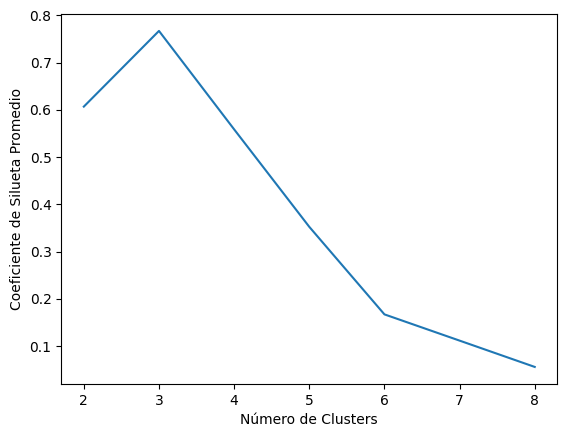

In [ ]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lectura del archivo CSV
data = pd.read_csv('https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/frutas_2.csv')

# Lista para almacenar los valores medios del coeficiente de silueta
silhouette_avgs = []

# Rango de número de clusters que quieres probar
range_n_clusters = range(2, min(len(data), 11))  # Por ejemplo, de 2 a 10

for n_clusters in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = cluster.fit_predict(data)

    silhouette_avg = silhouette_score(data, labels)
    silhouette_avgs.append(silhouette_avg)

# Encuentra el número de clusters que maximiza el coeficiente de silueta
optimal_clusters = range_n_clusters[silhouette_avgs.index(max(silhouette_avgs))]

print(f"El número óptimo de clusters es: {optimal_clusters}")

# Puedes visualizar los coeficientes de silueta para cada número de clusters
plt.plot(range_n_clusters, silhouette_avgs)
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.show()


# **Coeficiente Silueta**

La métrica de silueta es un método de interpretación y validación de consistencia interna de los datos en un análisis de clustering. Proporciona una medida de qué tan bien cada objeto ha sido clasificado.

El coeficiente de silueta es una medida de cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El coeficiente toma valores entre -1 y 1, donde:

- Un valor cercano a +1 indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración de clustering es apropiada.
- Un valor de 0 indica que el objeto está en la frontera entre dos clusters.
- Un valor cercano a -1 indica que el objeto está mal emparejado con su propio cluster y debería haber sido clasificado en un cluster vecino.

Para interpretar estos valores en un análisis de clustering:

1. **Valores Altos**: Significan que el objeto se encuentra bien dentro de su cluster, con una alta cohesión y una buena separación de otros clusters.
2. **Valores Bajos o Negativos**: Indican que el objeto podría pertenecer a otro cluster, hay solapamiento entre clusters o los clusters están dispersos y no bien definidos.
3. **Valores Cercanos a Cero**: Significan que el objeto está cerca del límite de decisión entre dos clusters vecinos.

### Cómputo del Coeficiente Silueta para un punto de datos en clustering:

1. **Calcula la cohesión (a)**: Mide qué tan bien se ajusta un punto al cluster al que ha sido asignado. Se calcula como el promedio de la distancia (que puede ser distancia euclidiana, manhattan, etc., dependiendo de la métrica utilizada) entre el punto y todos los otros puntos en el mismo cluster.

2. **Calcula la separación (b)**: Determina qué tan bien se separa un punto de su cluster más cercano al que no pertenece. Se calcula como el promedio de la distancia entre el punto y todos los puntos en el cluster más cercano diferente del suyo.

3. **Computa el coeficiente de silueta (s)**: Para cada punto, el coeficiente de silueta se calcula utilizando la cohesión y la separación con la siguiente fórmula:

   \[ s = \frac{b - a}{\max(a, b)} \]

   Donde:
   - \( a \) es la distancia media del punto a los otros puntos en el mismo cluster (cohesión).
   - \( b \) es la distancia media del punto a los puntos en el cluster vecino más cercano (separación).

El coeficiente de silueta varía de -1 a 1. Si es cercano a 1, indica que el punto está bien emparejado con su propio cluster y lejos de los otros clusters. Si el coeficiente es cercano a 0, indica que el punto está cerca de la frontera de decisión entre dos clusters vecinos. Si el coeficiente es cercano a -1, sugiere que el punto ha sido asignado al cluster equivocado.

Para evaluar la calidad del clustering en su conjunto, se promedian los coeficientes de silueta de todos los puntos. Un valor promedio cercano a 1 sugiere un buen clustering, mientras que un valor cercano a 0 o negativo puede indicar un ajuste deficiente.

In [ ]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Lectura del archivo CSV
data = pd.read_csv('/content/frutas_2.csv')

# Implementación del Clustering Jerárquico con un número fijo de clusters
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = cluster.fit_predict(data)

# Si el número de clusters únicos es mayor que 1, calculamos el coeficiente de silueta
if len(np.unique(labels)) > 1:
    silhouette_avg = silhouette_score(data, labels)
    print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

# Añade las etiquetas al dataframe original para su visualización
data['Cluster'] = labels
print(data)


El coeficiente de silueta promedio es: 0.7669803485806808
   Peso  Tamano  Cluster
0   150     8.0        2
1   160     8.5        2
2   155     8.2        2
3   180     9.0        1
4   190     9.5        1
5   185     9.2        1
6   120    15.0        0
7   130    16.0        0
8   125    15.5        0
